# Question 1  

In this section you will be required to estimate the value of:

$$ \int_0^2 cos(x) dx$$

We can get the closed-form solution of the above integral in the following way:

$$ \int_0^2 cos(x) dx = sin(2) - sin(0) = 0.90$$

#### a. Write the above as an expectation (the form of this expectation should be apparent in your code). (10% of total points)


Using the Monte Carlo Estimation we get:

$$ \int_0^{2} cos(x) dx = 2 \int_0^{2} \frac{1}{2} cos(x) dx = 2 E[cos(X)]$$

#### b.  Estimate the value of the integral as a function of sample size. Use sample sizes of 1000, 2000, ..., 50000.  (10% of total points)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Simulating the value of the cos integral

# create empty vectors that we can use to store the value 
# of the Monte Carlo estimates and standard deviations, with 50 different sample sizes,
# ranging from 1000 to 50000
# This will be useful for plotting these values later

mcos_estimates = [None]*50
mcos_std = [None]*50

for i in range(1, 51):
    # generate uniform random variables creating 1000x1 vector of numbers from U(0,1)
    # We then times this by 2 so that our numbers are sampled from U(0, 2)
    unif_array = uniform.rvs(size = i*1000)*2
    
    # create temp value that holds the cos function valuations
    cos_val = np.cos(unif_array)*2
    
    # Calculate the Monte Carlo estimate for the given sample size
    # The np.mean function returns the average value of the sin_val vector 
    # i.e. the Monte Carlo estimate.
    mcos_estimates[i-1] = np.mean(cos_val)
    
    # calculate the standard deviation of the sample 
    # and scale it by the square-root of the sample size.
    # This calculates the SD of the simulated MC estimator
    mcos_std[i-1] = np.std(cos_val)/np.sqrt(i*1000)

#### c. Plot the estimates against the analytical value of the integral. (10% of total points)

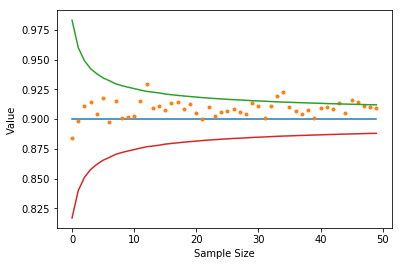

In [10]:
# plot the analytical solution of the integral as a line
plt.plot([0.90]*50)
# plot the Monte Carlo Estimates for the integral
plt.plot(mcos_estimates, ".")
# plot 3 SD error bounds around our analytical solution
plt.plot(0.90+np.array(mcos_std)*3)
plt.plot(0.90-np.array(mcos_std)*3)
plt.xlabel("Sample Size")
plt.ylabel("Value")
plt.show()

# Question 2 

In this problem, you will be required to implement code which prices a European put option. Use the following information for pricing:

- Share volatility is 30%



- The risk-free rate is 10%



- Average share return is 15%



- The current share price is $100



- The strike on the European put option is $110



- The term of the contract is 6 months

#### Payoff of a Put Option

$$ (K - S_T)^+ = max(K - S_T, 0) $$


#### a. Write a function which takes a risk-free rate, the initial share price, the share volatility, and term as inputs, and determines the terminal value of a share price, assuming geometric Brownian Motion. Note, you should vectorize this function where possible. (8% of total points)

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math as m
import random as r

# Share specific info
risk_free = 0.1
S_0 = 100
sigma = 0.3

# Option specific info
strike = 110
T = 0.6
current_time = 0

In [13]:
def terminal_shareprice(S_0, risk_free_rate, sigma, Z, T):
    """
    Generates the terminal share price given some random normal values, z
    """
    # It returns an array of terminal stock prices.
    return S_0*np.exp((risk_free_rate-sigma**2/2)*T+sigma*np.sqrt(T)*Z)

#### b. Write a function which takes terminal share prices, a strike price, a risk-free rate and term as inputs, and gives out the discounted value of a European put option. (8% of total points)


In [16]:
def discounted_put_payoff(S_T, K, risk_free_rate, T):
    """
    Function for evaluating the discounted payoff of a put option
    in the Monte Carlo Estimation
    """
    # It returns an array which has the value of the put for each terminal stock price.
    return np.exp(-risk_free_rate*T)*np.maximum(K - S_T, 0)

#### c. Write a for loop which cycles through sample size (1000, 2000, ..., 50000), and calculates the Monte Carlo estimate of a European put option, and well as the standard deviation of the Monte Carlo estimator. (8% of total points)


In [17]:
# Generate Monte Carlo estimates of Vanilla European Put Options
np.random.seed(0)

# Empty arrays which can be used to store estimate values for different
# sample size
mput_est = [None]*50
mput_std = [None]*50

# Generating Monte Carlo estimates as a function of sample size
# The for loop implements Monte Carlo for a number of different sample sizes.
for i in range(1, 51):
    # creates an array of standard normal random variables, which are 
    norm_array = norm.rvs(size = 1000*i)
    # used to simulate terminal stock prices
    term_val = terminal_shareprice(S_0, risk_free, sigma, norm_array, T-current_time)
    # These terminal stock prices are passed into the function which values 
    # a call on the stock
    mput_val = discounted_put_payoff(term_val, strike, risk_free, T-current_time)
    # store the mean and SD of these Put values
    mput_est[i-1] = np.mean(mput_val)
    mput_std[i-1] = np.std(mput_val)/np.sqrt(i*1000)

#### d. Plot the Monte Carlo estimates, the analytical European put option value, and three standard deviation error bounds. Note that the analytical put value is given by: (8% of total points)

$$-S_0 \Phi (-d_1) + \Phi(-d_2)Ke^{-rT}$$

where


$$ d_1 = \frac{ln(\frac{S_0}{K}) + (r + \frac{\sigma^2}{2})T} {\sigma \sqrt{T}} $$
$$ d_2 = d_1 - \sigma \sqrt{T} $$

In [19]:
# Code for the analytical solution for Vanilla European Put Options
d_1 = (np.log(S_0/strike) + (risk_free + sigma**2/2)*(T - current_time))/(sigma*m.sqrt(T-current_time))
d_2 = d_1 - sigma*m.sqrt(T-current_time)

analytic_putprice = -S_0*norm.cdf(-d_1) + strike*m.exp(-risk_free*(T-current_time))*norm.cdf(-d_2)

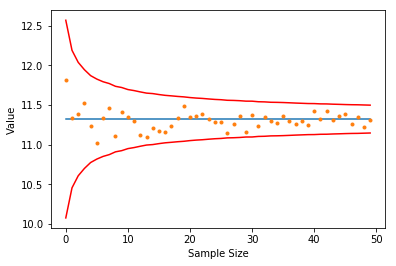

In [20]:
# plotting the graph
plt.plot([analytic_putprice]*50)
plt.plot(mput_est, ".")
plt.plot(analytic_putprice+3*np.array(mput_std), "r")
plt.plot(analytic_putprice-3*np.array(mput_std), "r")
plt.xlabel("Sample Size")
plt.ylabel("Value")
plt.show()

# Additional Questions

#### Question 3:  Price a European call option using the analytic formula. (5% of total points)

In [21]:
# Code for the analytical solution for Vanilla European Call Options
d_1 = (np.log(S_0/strike) + (risk_free + sigma**2/2)*(T - current_time))/(sigma*m.sqrt(T-current_time))
d_2 = d_1 - sigma*m.sqrt(T-current_time)

analytic_callprice = S_0*norm.cdf(d_1) - strike*m.exp(-risk_free*(T-current_time))*norm.cdf(d_2)

With the closed form solution given by:

$$ S_0 \Phi(-d_1) - \Phi(-d_2)Ke^{-rT} $$

where, 

$$ d_1 = \frac{ln(\frac{S_0}{K}) + (r + \frac{\sigma^2}{2})T} {\sigma \sqrt{T}} $$
$$ d_2 = d_1 - \sigma \sqrt{T} $$

#### Question 4: Do your prices for the call and put satisfy put-call parity? (5% of total points)


The put-call parity relationship is given by the following equation:

$$\pi_c - \pi_p = E^Q[e^{-rt}(S_T - K)] = S_0 - Ke^{-rt}$$

We can check if this relationship holds by plugging in the results we obtained in the previous sections

In [29]:
lhs = analytic_callprice - analytic_putprice
rhs = S_0 - strike*m.exp(-risk_free*(T-current_time))
lhs == rhs

True

#### Question 5: Which 3 markets are involved in put-call parity? (5% of total points)

1. Spot Markets: for the prices of the underlying shares



2. Options Market: for the prices of Call and Put options



3. Fixed Income Markets: for the present value of a zero-coupon bond (or bank account)

#### Question 6: How close was the option price using Monte Carlo to the option price using the analytical formula? (5% of total points)

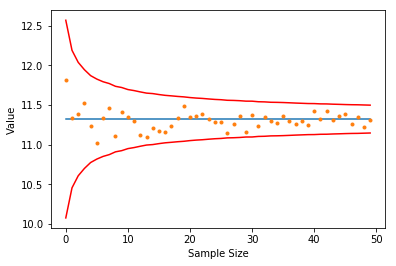

In [30]:
# plotting the graph
plt.plot([analytic_putprice]*50)
plt.plot(mput_est, ".")
plt.plot(analytic_putprice+3*np.array(mput_std), "r")
plt.plot(analytic_putprice-3*np.array(mput_std), "r")
plt.xlabel("Sample Size")
plt.ylabel("Value")
plt.show()

As we can see from the plot, the larger the sample size, the closer the Monte Carlo Estimation is to the Analytical solution.

#### Question 7: Why do we learn methods besides the analytic methods? (5% of total points)

We use other methods besides the analytic methods when evaluating integrals using the analytic methods becomes too difficult and when there is no known solution to the integral. Therefore, we use estimation techniques to try and give an idea of what the integral evaluates to. One of these methods is the Monte Carlo Method.

#### Question 8: Why do we prefer analytic methods? (5% of total points)

When an integral has a closed-form solution, it is more convenient to use the analytic method in order to evaluate it as it give a much better result than estimation techniques.

#### Question 9: Why do theoretical prices tend to underestimate market prices? (4% of total points)

#### Question 10: What role does hedging play in pricing an option? (4% of total points)

Hedging plays a role when we are trying to derive the Black-Scholes Equation for Option Pricing through the process known as delta-hedging rather than pure portfolio replication. It plays the role of reducing the risk of the optionby trading the underlying stock therefore making the value of the portfolio remain unchanged when small changes occur in the value of the underlying security.